# NETFLIX

## 목차

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import operator
import warnings
import missingno as msno
warnings.filterwarnings(action='ignore')

## 1. 데이터 칼럼 소개 및 전처리 과정

In [13]:
data_path = './netflix_titles.csv'
df = pd.read_csv(data_path)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


- show_id : 아이디
- type : 타입
- title : 이름
- director : 제작자
- cast : 출연 배우
- country : 만든 나라
- date_added : 추가된 날짜
- release_year : 실제 출시 년도
- rating : 영상 등급
- duration : Total Duration - in minutes or number of seasons
- listed_in : 장르
- description: 설명

In [14]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

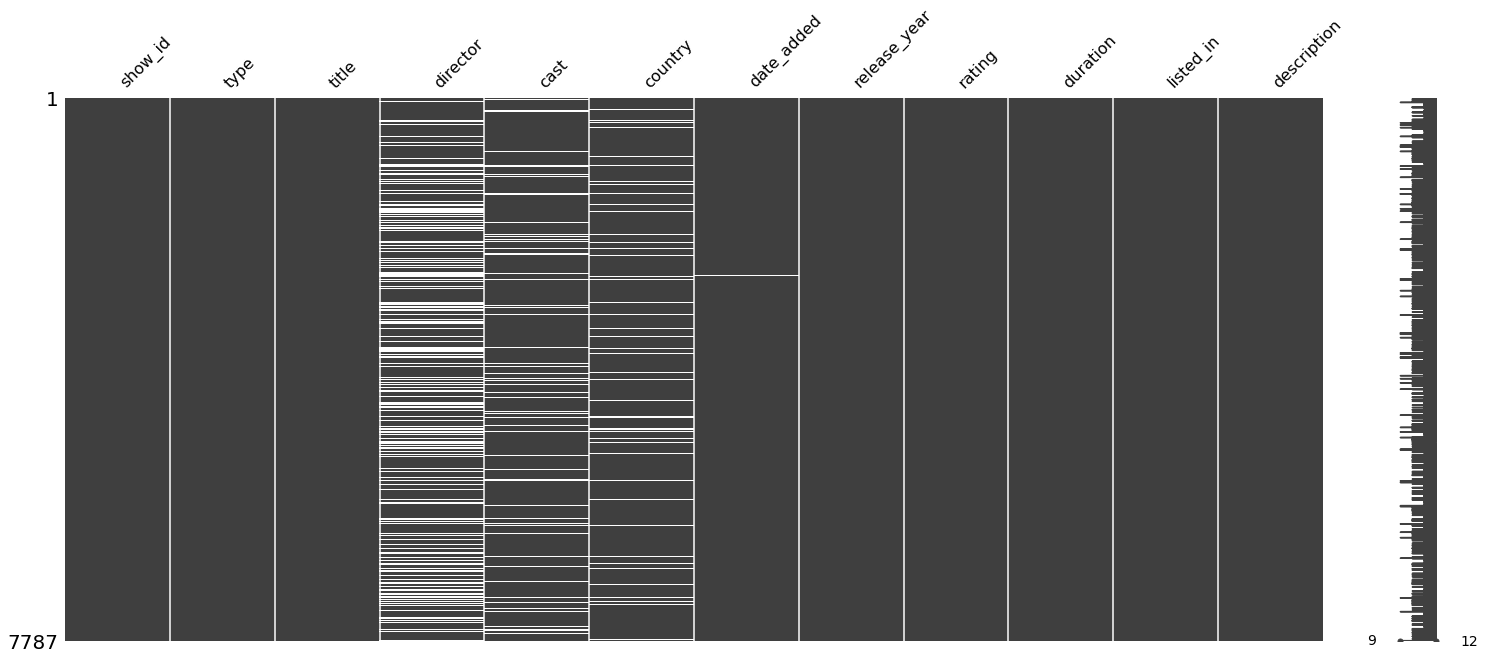

In [15]:
msno.matrix(df)

<AxesSubplot:>

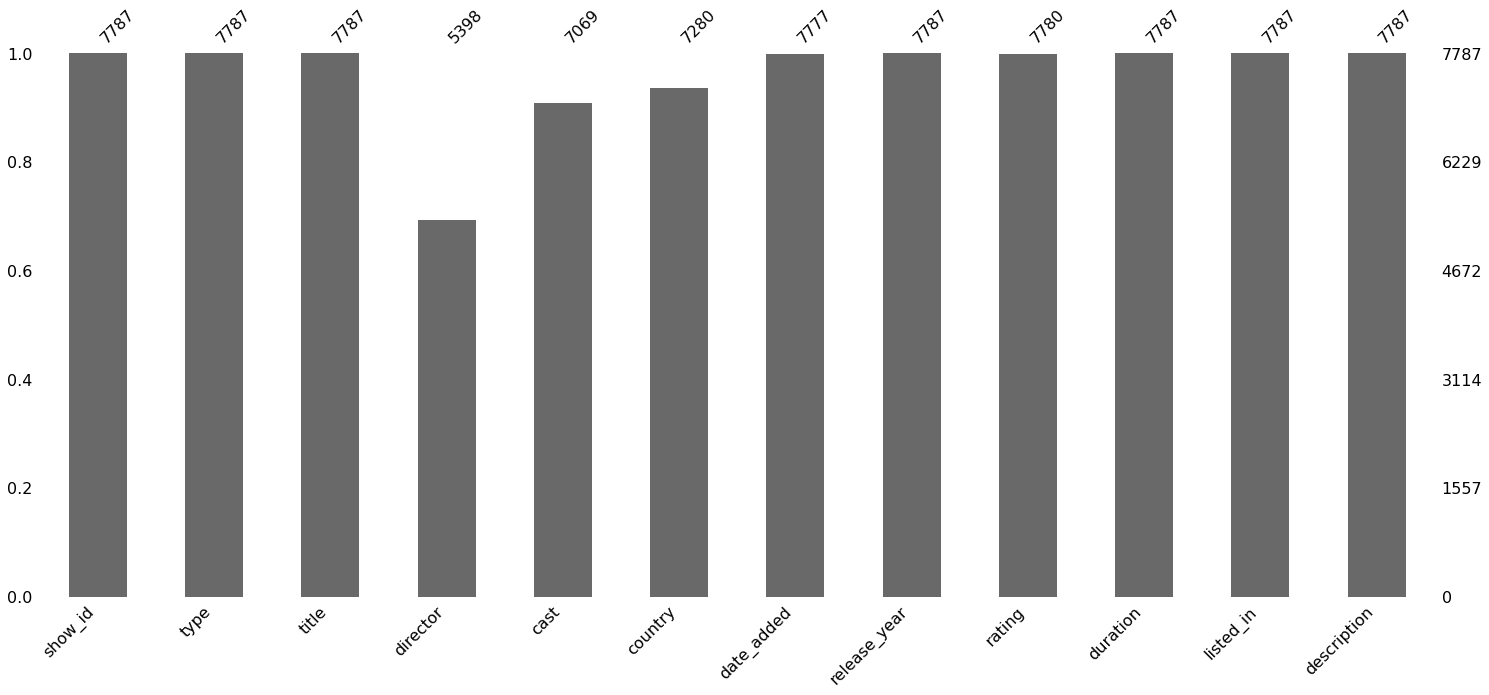

In [16]:
msno.bar(df)

In [17]:
df_movie = df[df['type'] == 'Movie']
df_tv = df[df['type'] == 'TV Show']

In [18]:
rating_ages = {
    'PG-13' : "Teens(13+)",
    'TV-MA' : "Adults(18+)",
    'PG' : "Older Kids(7+)",
    'TV-14' : "Young Adults(16+)",
    'TV-PG' : "Older Kids(7+)",
    'TV-Y' : "Kids(All)",
    'TV-Y7' : "Older Kids(7+)",
    'R' : "Adults(18+)",
    'TV-G' : "Kids(All)",
    'G' : "Kids(All)",
    'NC-17' : "Adults(18+)",
    '74 min' : "Unknown",
    '84 min' : "Unknown",
    '66 min' : "Unknown",
    'NR' : "Adults(18+)",
    'Unknown' : "Unknown",
    'TV-Y7-FV' : "Older Kids(7+)",
    'UR' : "Adults(18+)"
}

df["rating_ages"] = df["rating"].replace(rating_ages)

del df['director']

## 2. 넷플릭스에는 어떤 타입의 영상이 많은가?

show_id                                                        s1
type                                                      TV Show
title                                                          3%
cast            João Miguel, Bianca Comparato, Michel Gomes, R...
country                                                    Brazil
date_added                                        August 14, 2020
release_year                                                 2020
rating                                                      TV-MA
duration                                                4 Seasons
listed_in       International TV Shows, TV Dramas, TV Sci-Fi &...
description     In a future where the elite inhabit an island ...
rating_ages                                           Adults(18+)
Name: 0, dtype: object

In [47]:
x = df['type'].value_counts().reset_index()
x = x.rename(columns={'index': 'type', 'type': 'counts'})
fig = px.bar(x, x='type',y='counts',color='type', text_auto = True)
fig.show()

In [43]:
fig = px.pie(x,values='counts',names='type',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 1)))

### INSIGHT
**넷플릭스에는 영화가 더 많기 때문에 영화를 좋아하는 사람에게 더 좋은 OTT 선택지가 될 수 있다.**

## 3. 어느 나라가 많은 작품 제작에 참여하였는가?

In [48]:
dict_country = {}
dict_movie_country = {}
dict_tv_country = {}

def check_dict(country, dict_country):
    if country in dict_country:
        dict_country[country] += 1
    else:
        dict_country[country] = 1 
    return dict_country
def check_country(country):
    country = country.lstrip()
    if country == 'East Germany':
        return country.split()[1]
    elif country == 'West Germany':
        return country.split()[1]
    elif country == 'Soviet Union':
        return 'Russia'
    else:
        return country
        
for i, j in zip(df[df['country'].isnull() == False]['type'], df[df['country'].isnull() == False]['country']):
    for k in j.split(','):
        k = check_country(k)
        if i == 'Movie':
            dict_movie_country = check_dict(k, dict_movie_country)
        else:
            dict_tv_country = check_dict(k, dict_tv_country)
        dict_country = check_dict(k, dict_country)

In [54]:
def TopN_country(dict_country, n):
    country_key = []
    country_value = []
    sort_list = sorted(dict_country.items(), key=operator.itemgetter(1), reverse=True)
    for k, i in enumerate(sort_list):
        country_key.append(i[0])
        country_value.append(i[1])

    td = {
        'country': country_key,
        'count' : country_value
    }
    
    country = pd.DataFrame(td)
    if len(country) > n:
        top = country[:n]
        etc = country[n:]
        num = 0
        for i in etc['count']:
            num += i
        top = top.append({'country' : 'etc', 'count' : num}, ignore_index=True)
    else:
        top = country
    fig = px.bar(top[:n], x='country', y='count', color='country', title='상위 '+str(n)+'개국', height=700)
    fig.show()
    fig = px.pie(top, values='count', names='country', title='상위 '+str(n)+'개국 점유율', height=700)
    fig.show()

### 전체 데이터 활용한 분석

In [55]:
TopN_country(dict_country, 10)

### 영화 데이터 활용한 분석

In [16]:
TopN_country(dict_tv_country, 10)

### TV Show 데이터 활용한 분석

In [44]:
TopN_country(dict_movie_country, 10)

### 월드맵을 이용한 분석

In [45]:
b = pd.read_excel('./iso.xlsx')
b[b['country_name'] == 'Qatar'.upper()]['iso'].iloc[0]
iso_list = []
country_list = []
count_list = []
for i, j in dict_country.items():
    if i.upper() in list(b['country_name']):
        iso_list.append(b[b['country_name'] == i.upper()]['iso'].iloc[0])
        country_list.append(i)
        count_list.append(j)
    elif i == '':
        continue
    else:
        iso_list.append(i)
        country_list.append(i)
        count_list.append(j)
iso_list[14] = 'KOR'
iso_list[27] = 'RUS'
iso_list[37] = 'TWN'
iso_list[53] = 'SYR'
iso_list[49] = 'VNM'
iso_list[109] = 'VAT'
td = {
    'iso' : iso_list,
    'country' : country_list,
    'count' : count_list
}
iso_map = pd.DataFrame(td)
iso_map = iso_map.sort_values('count', ascending=False)
fig = px.choropleth(iso_map, locations="iso", color="count", hover_name="country")
fig.show()
fig = px.choropleth(iso_map[1:], locations="iso", color="count", hover_name="country")
fig.show()
fig = px.choropleth(iso_map[2:], locations="iso", color="count", hover_name="country")
fig.show()

### INSIGHT
**전체 작품 기준으로는 미국이 가장 많은 작품 제작에 참여하였고 인도, 영국, 캐나다 순으로 많았다.  
영화를 기준으로는 미국이 가장 많고 인도, 영국, 캐나다 순으로 많았다.  
TV Show를 기준으로는 미국이 역시 가장 많고 일본, 한국 순으로 많았다.**

## 4. 영화 및 TV Show에서 어떤 장르의 컨텐츠가 많은가?

### 여러가지 장르를 통합한 장르

Text(0.5, 1.0, 'Top 10 Genre in Movies')

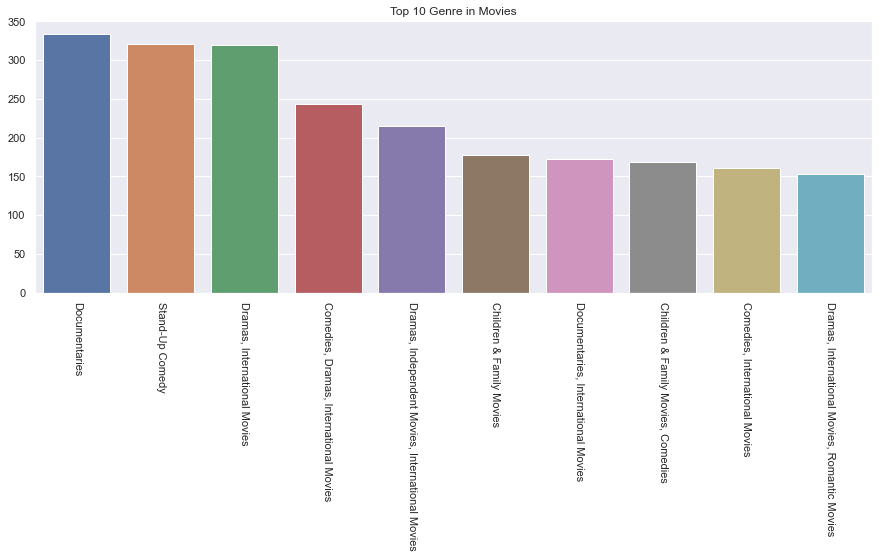

In [24]:
sns.barplot(
    data = df_movie,
    x = df_movie['listed_in'].value_counts().head(10).index,
    y = df_movie['listed_in'].value_counts().head(10).values)
plt.xticks(rotation=-90)
plt.title("Top 10 Genre in Movies")

Text(0.5, 1.0, 'Top 10 Genre in TV Show')

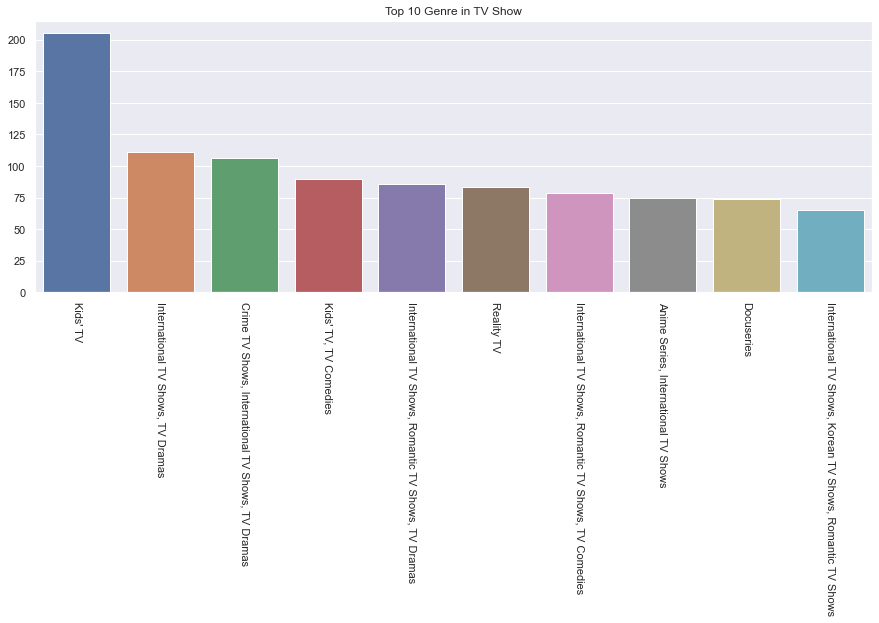

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(
    data = df_tv,
    x = df_tv['listed_in'].value_counts().head(10).index,
    y = df_tv['listed_in'].value_counts().head(10).values)
plt.xticks(rotation=270)
plt.title("Top 10 Genre in TV Show")

### 각 장르별로 세분화된 장르

In [26]:
def make_graph_genre(data, n):
    genre = {}
    for i in data['listed_in']:
        for j in i.split(','):
            if j.lstrip() in genre:
                genre[j.lstrip()] += 1
            else:
                genre[j.lstrip()] = 0
    td = {
        'genre': genre.keys(),
        'count': genre.values()
    }
    genre_count = pd.DataFrame(td)
    genre_count.sort_values('count', ascending=False, inplace=True)
    if len(genre_count) > n:
        genre_count = genre_count[:n]
    fig = px.bar(genre_count, x='genre', y='count', color='genre', title='가장 많은 장르 Top '+str(n), height=1000)
    fig.show()
    fig = px.pie(genre_count, names='genre', values='count', color='genre', title='가장 많은 장르 Top '+str(n), height=700)
    fig.show()

In [27]:
make_graph_genre(df, 30)

## 5. 각 나라별 장르에 따른 작품수

In [56]:
clean_country = df[df['country'].isnull() == False]
clean_country.drop(['show_id', 'type', 'cast', 'date_added', 'release_year', 'rating', 'duration', 'description'], axis=1, inplace=True)
clean_country.set_index("title", inplace=True)
title = []
country = []
genre = []
for i, j, k in zip(clean_country.index, clean_country['country'], clean_country['listed_in']):
    for a in j.split(','):
        title.append(i)
        country.append(a.lstrip())
        genre.append(k)
        
country2 = []
genre2 = []
for i, j in zip(country, genre):
    for a in j.split(','):
        country2.append(i)
        genre2.append(a.lstrip())
        
country_genre = {}
for i, j in zip(country, genre):
    if i in country_genre:
        for a in j.split(','):
            if a.lstrip() in country_genre[i]:
                country_genre[i][a.lstrip()] += 1
            else:
                country_genre[i][a.lstrip()] = 1
    else:
        country_genre[i] = {}
        for a in j.split(','):
            if a.lstrip() in country_genre[i]:
                country_genre[i][a.lstrip()] += 1
            else:
                country_genre[i][a.lstrip()] = 1

def make_country_top_genre(data, country_name, n):
    g = []
    c = []
    for key, value in data[country_name].items():
        g.append(key)
        c.append(value)
        
    td = {
        'genre': g,
        'count' : c
    }
    country_genre = pd.DataFrame(td)
    country_genre.sort_values('count', ascending=False, inplace=True)
    if len(country_genre) > n:
        top = country_genre[:n]
        num = 0 
        for i in country_genre[n:]['count']:
            num += i
        top = top.append({'genre': 'etc', 'count' : num}, ignore_index=True)
    else:
        top = country_genre
    fig = px.bar(top, x='genre', y='count', color='genre', height=1000, title=country_name+'에서 가장 많이 만든 장르 Top' + str(n))
    fig.show()
    fig = px.pie(top, names='genre', values='count', color='genre', height=700, title=country_name+'에서 가장 많이 만든 장르 Top' + str(n))
    fig.show()

In [57]:
# India, United Kingdom, Canada, Japan, France, Spain, South Korea, Germany, Mexico, Australia, Italy, United States

make_country_top_genre(country_genre, 'United States', 10)

### INSIGHT
**각 나라별로 가장 많이 제작한 장르를 보면 그 나라가 선호하는 장르를 알 수 있었다.**

## 6. 가장 많은 컨텐츠가 추가된 월, 연도는 언제인가?

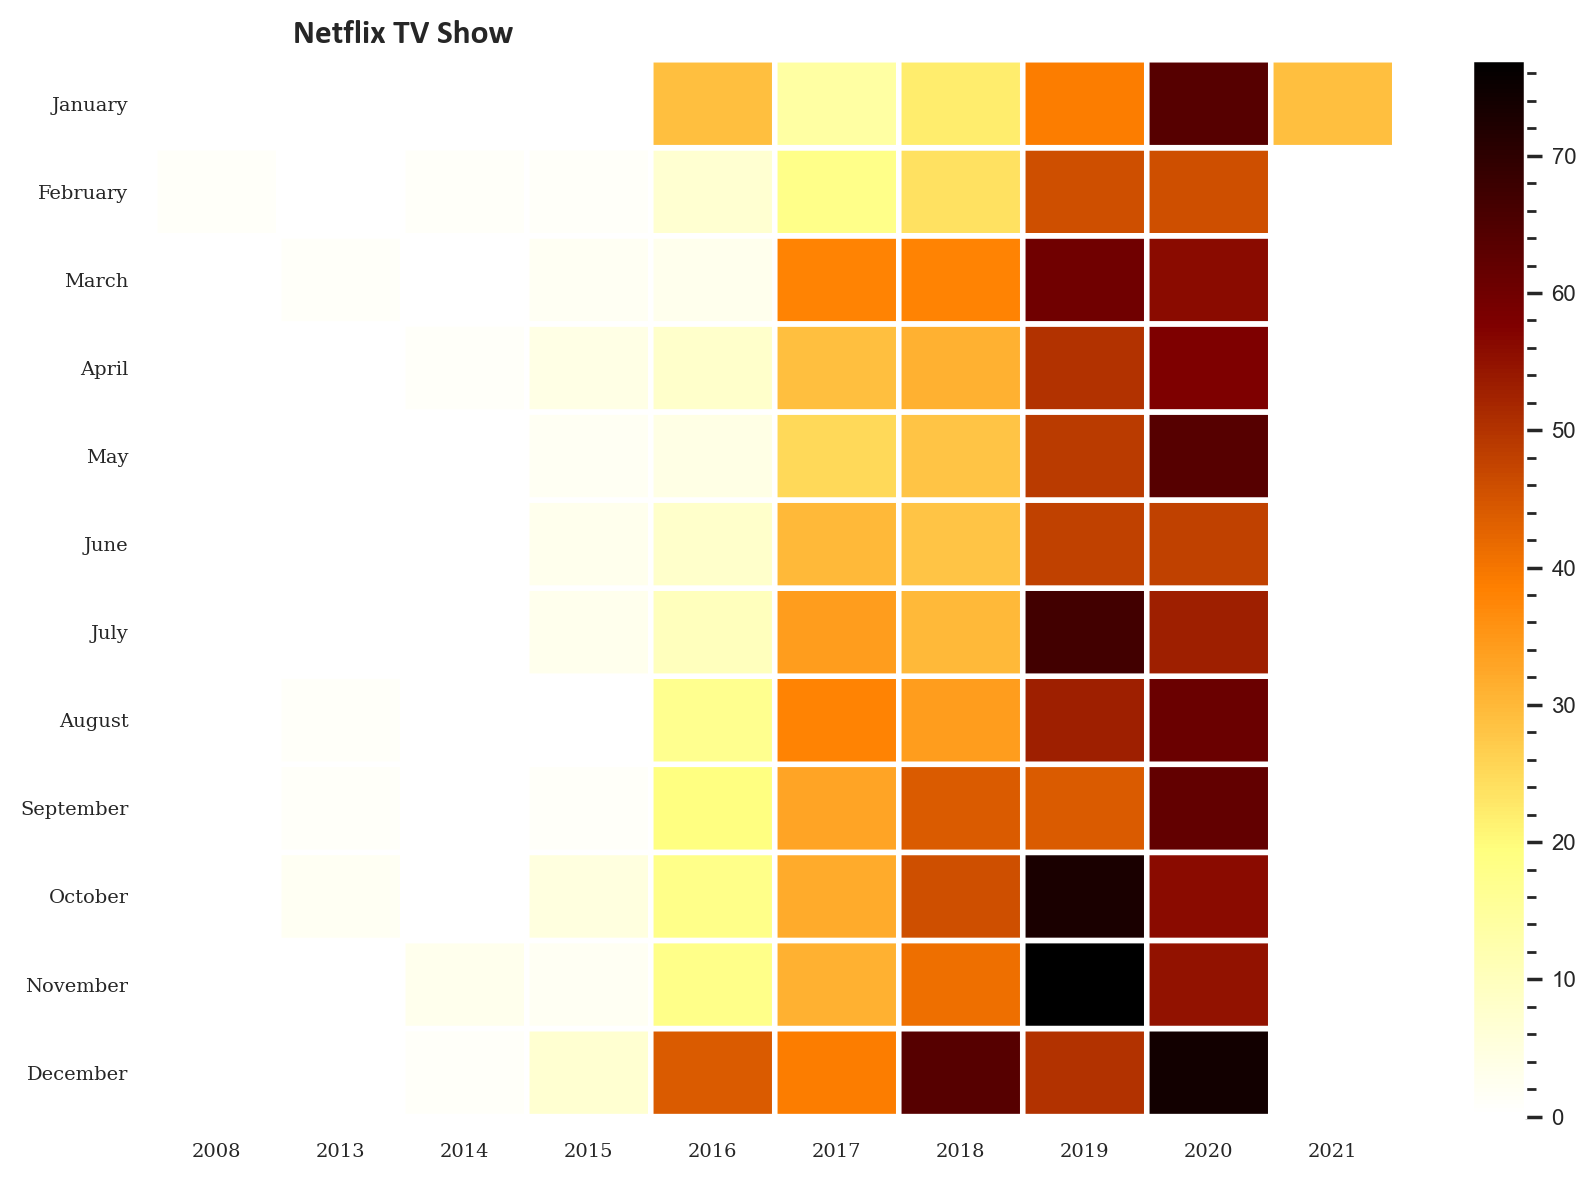

In [59]:
netflix_date = df_tv[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_netflix_date = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df_netflix_date, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_netflix_date.columns), 1), df_netflix_date.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_netflix_date.index), 1), df_netflix_date.index, fontsize=7, fontfamily='serif')

plt.title('Netflix TV Show', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

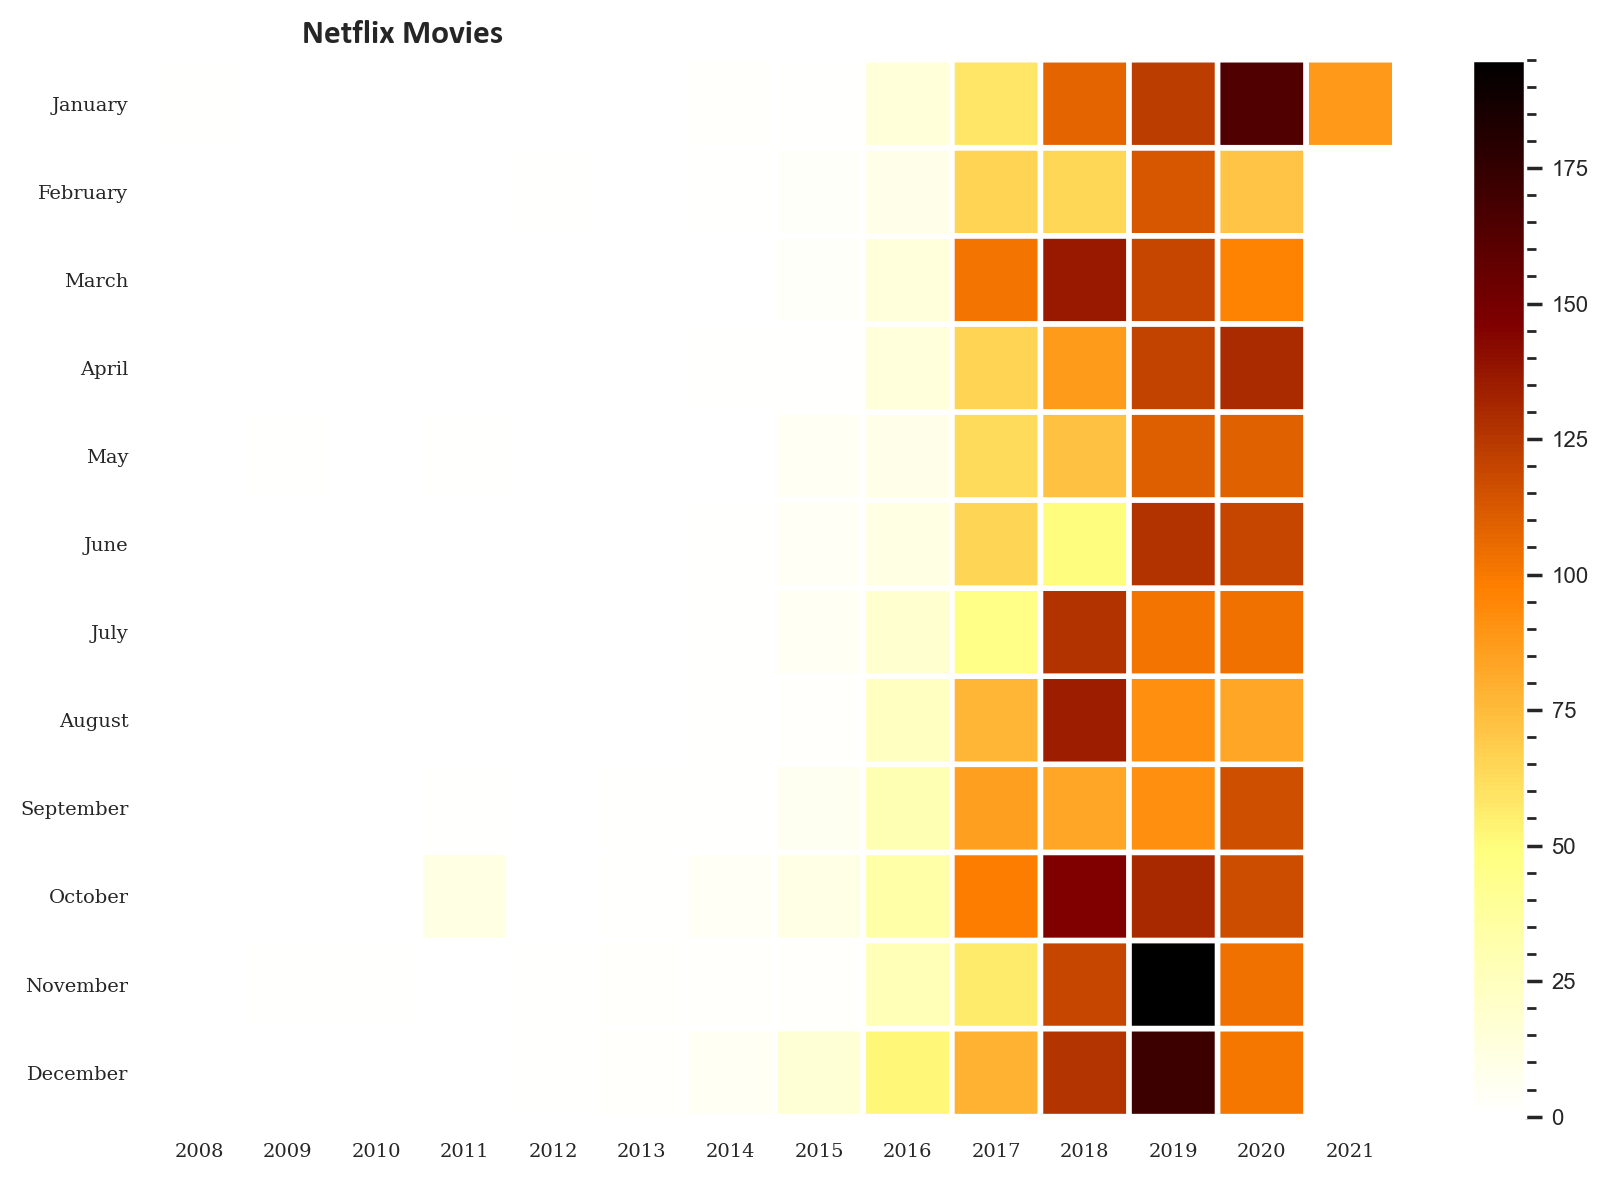

In [60]:
netflix_date = df_movie[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_netflix_date = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df_netflix_date, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_netflix_date.columns), 1), df_netflix_date.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_netflix_date.index), 1), df_netflix_date.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Movies', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

### INSIGHT
**히트맵을 보면 TV Show 와 Movie가 가장 많이 추가되는 때는 연말인 것으로 확인할 수 있다.  
새로운 컨텐츠를 시청하고 싶으면 연말에 넷플릭스를 등록하면 상대적으로 새로운 컨텐츠를 시청할 수 있다.**

In [31]:
df_date = df[['date_added']].dropna()
df_date['year'] = df_date['date_added'].apply(lambda x : x.split(', ')[-1])
df_date

,date_added,year
0,"August 14, 2020",2020
1,"December 23, 2016",2016
2,"December 20, 2018",2018
3,"November 16, 2017",2017
4,"January 1, 2020",2020
...,...,...
7782,"October 19, 2020",2020
7783,"March 2, 2019",2019
7784,"September 25, 2020",2020
7785,"October 31, 2020",2020


In [32]:
a = df_date['year'].value_counts().sort_index(ascending =True)
a

2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      25
2015      88
2016     443
2017    1225
2018    1685
2019    2153
2020    2009
2021     117
Name: year, dtype: int64

In [33]:
a.index

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [34]:
date_count = []
date_list = []
for i, j in zip(a.index, a):
    date_list.append(i)
    date_count.append(j)

In [35]:
td = {
    'year' : date_list,
    'count' : date_count
}

c = pd.DataFrame(td)

In [36]:
c

,year,count
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,25
7,2015,88
8,2016,443
9,2017,1225


In [37]:
c['year'].iloc[0]

'2008'

### 연도별 넷플릭스에 업로드된 새로운 컨텐츠 수

In [38]:
fig = px.bar(c, x='count', y='year', color='year', orientation='h')
fig.show()

In [39]:
years_series=df['release_year']
years_count=years_series.value_counts()
years_count=years_count.sort_index(ascending =True)


In [40]:
y = []
c = []
for i, j in zip(years_count.index, years_count.values):
    y.append(str(i))
    c.append(j)
    
td = {
    'year':y,
    'count':c
}
r = pd.DataFrame(td)
r = r[-20:]
r

,year,count
53,2002,45
54,2003,49
55,2004,59
56,2005,73
57,2006,85
58,2007,85
59,2008,125
60,2009,137
61,2010,173
62,2011,166


### 넷플릭스에 등록된 작품들의 출시 연도

In [41]:
fig = px.bar(r, x='count', y='year', color='year', orientation='h')
fig.show()

### INSIGHT
**넷플릭스 작품 등록 연도를 보면 2019년까지 증가하다가 감소하는 추세를 보이고 있다.  
코로나로 인한 영향일 수도 있고 넷플릭스 측에서 컨텐츠의 완성도를 위해 선별하는 과정이 까다로워졌을 것으로 예상한다.**

## 7. 넷플릭스 컨텐츠의 주된 연령등급은 어떻게 되는가?

In [42]:
type(r['year'].iloc[0])

str

In [57]:
rating_ages = {
    'PG-13' : "Teens(13+)",
    'TV-MA' : "Adults(18+)",
    'PG' : "Older Kids(7+)",
    'TV-14' : "Young Adults(16+)",
    'TV-PG' : "Older Kids(7+)",
    'TV-Y' : "Kids(All)",
    'TV-Y7' : "Older Kids(7+)",
    'R' : "Adults(18+)",
    'TV-G' : "Kids(All)",
    'G' : "Kids(All)",
    'NC-17' : "Adults(18+)",
    '74 min' : "Unknown",
    '84 min' : "Unknown",
    '66 min' : "Unknown",
    'NR' : "Adults(18+)",
    'Unknown' : "Unknown",
    'TV-Y7-FV' : "Older Kids(7+)",
    'UR' : "Adults(18+)"
}

df["rating_ages"] = df["rating"].replace(rating_ages)

print(df["rating_ages"].unique())

['Adults(18+)' 'Teens(13+)' 'Young Adults(16+)' 'Older Kids(7+)'
 'Kids(All)' nan]


In [68]:
df_movie = df[df["type"] == 'Movie']
df_tv = df[df["type"] == 'TV Show']

Text(0.5, 1.0, 'Movies by age')

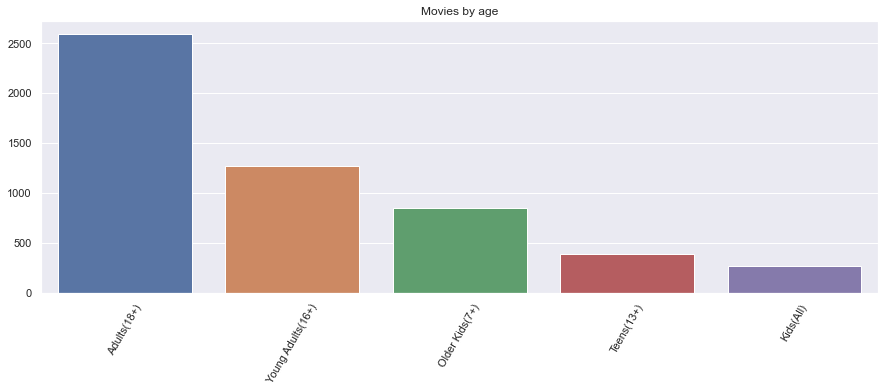

In [67]:
plt.figure(figsize=(15,5))
sns.barplot(
    data = df_movie,
    x = df_movie['rating_ages'].value_counts().index,
    y = df_movie['rating_ages'].value_counts().values)
plt.xticks(rotation=60)
plt.title("Movies by age")

Text(0.5, 1.0, 'TV Show by age')

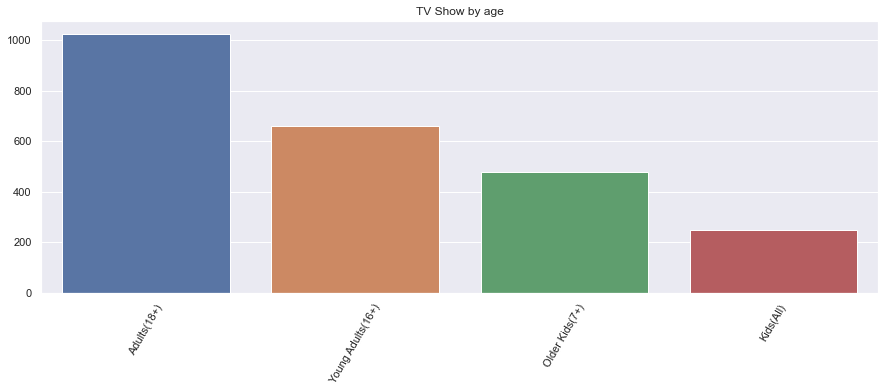

In [69]:
plt.figure(figsize=(15,5))
sns.barplot(
    data = df_tv,
    x = df_tv['rating_ages'].value_counts().index,
    y = df_tv['rating_ages'].value_counts().values)
plt.xticks(rotation=60)
plt.title("TV Show by age")

### INSIGHT
**넷플릭스에 있는 영화 및 TV Show는 대부분의 컨텐츠가 성인 연령 대상의 컨텐츠였다.  
아이들이 있는 가정에서는 넷플릭스가 아닌 다른 OTT 프로그램을 시청하는 것이 더 좋을 것 같다.**